In [211]:
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

filepath = '/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/code/'
# train_df.shape, train_df[~(train_df.content_id == -1)].shape

In [212]:
features = [
       'next_external_id', 
       'external_id', 
       'display_page', 
       'firsthour_consumptions_by_type__link_clicks',
       'firsthour_stories_by_action_type__share',
       'firsthour_video_views_10s_organic',
       'firsthour_video_complete_views_30s_organic',
       'firsthour_video_complete_views_organic',
       'twodays_consumptions_by_type__link_clicks',
       'twodays_stories_by_action_type__share',
       'twodays_video_views_10s_organic',
       'twodays_video_complete_views_30s_organic',
       'twodays_video_complete_views_organic',
        ]

one_hour_features = [
       'firsthour_consumptions_by_type__link_clicks',
       'firsthour_stories_by_action_type__share',
#        'firsthour_video_views_10s_organic',
#        'firsthour_video_complete_views_30s_organic',
#        'firsthour_video_complete_views_organic',
                ]

two_day_features = [
        'twodays_consumptions_by_type__link_clicks',
       'twodays_stories_by_action_type__share',
       'twodays_video_views_10s_organic',
       'twodays_video_complete_views_30s_organic',
       'twodays_video_complete_views_organic',
    ]

# cross_promoted_pages = 
# cross_promotion_features = all_pages

video_df = pd.read_csv('previous-to-next-page-info-videos-jun16.csv')
link_df = pd.read_csv(filepath+'previous-to-next-page-info.csv')

# all_pages = list(train.buzz_account_display_name.unique())
# all_pages = list(train.buzz_account_display_name.unique())
video_pages = list(video_df.display_page.unique())
link_pages = list(link_df.buzz_account_display_name.unique())
all_pages = video_pages + link_pages

In [213]:
link_df.columns
# def get_cross_posted_pages(x):
#     tf = link_df[link_df.buzz_external_id == x].sort_values('created_at', ascending = 1)
#     return tf.buzz_account_display_name.unique()

# link_df['pages'] = link_df['buzz_external_id'].apply(get_cross_posted_pages)
# link_df

Index(['next_external_id', 'buzz_external_id', 'buzz_account_display_name',
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       ...
       'Oh Great, More Politics', 'Einfach Tasty', 'BuzzFeed Steven L.',
       'The Try Guys', 'Ohmygod Yaaa', 'BuzzFeed Chloe', 'Nifty Science',
       'next_page', 'next_clicks', 'next_shares'],
      dtype='object', length=106)

In [214]:
train_df = pd.read_csv('previous-to-next-page-info-videos-jun16.csv')
page_infos = ['display_page', 'next_page']

train_features = one_hour_features + page_infos #+ cross_promotion_features

X_videos = train_df[train_features]
X_videos['next_clicks'] = train_df['next_clicks']
X_videos['next_shares'] = train_df['next_shares']
y_clicks_videos = train_df['next_clicks']
y_share_videos = train_df['next_shares']

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [215]:
one_hour_features = [
                   'ext_table1_consumptions_by_type__link_clicks',
#                    'ext_table1_consumptions_by_type__other_clicks',
#                    'ext_table1_reactions_like_total',
#                    'ext_table1_stories_by_action_type__comment',
#                    'ext_table1_stories_by_action_type__like',
                   'ext_table1_stories_by_action_type__share', 
#                    'ext_table1_engaged_fan',
#                    'ext_table1_fan_reach',
#                    'ext_table1_impressions',
#                    'ext_table1_impressions_fan', 
                ]

page_info = ['buzz_account_display_name', 'next_page']


train_df = pd.read_csv(filepath+'previous-to-next-page-info.csv')

train_features = one_hour_features + page_info #+ cross_promotion_features

X_links = train_df[train_features]
X_links['next_clicks'] = train_df['next_clicks']
X_links['next_shares'] = train_df['next_shares']
y_clicks_links = train_df['next_clicks']
y_share_links = train_df['next_shares']

X_columns = ['previous_clicks', 'previous_shares', 'previous_page', 'next_page', 'next_clicks', 'next_shares']
X_links.columns = X_columns
X_videos.columns = X_columns

# X_links = pd.get_dummies(data = X_links, columns=['previous_page', 'next_page'])
# X_videos = pd.get_dummies(data = X_videos, columns=['previous_page', 'next_page'])

test_cols = ['previous_clicks', 'previous_shares', 'next_clicks', 'next_shares']

# log = 0
log = 1

if log == 1:
    print("LOG SCALING!")
    for feat in test_cols:
        X_links[feat] = np.log(1+X_links[feat])
        X_videos[feat] = np.log(1+X_videos[feat])

    y_clicks_links = (np.log(1+y_clicks_links)).astype(int)
    y_share_links = (np.log(1+y_share_links)).astype(int)
    y_clicks_videos = (np.log(1+y_clicks_videos)).astype(int)
    y_share_videos = (np.log(1+y_share_videos)).astype(int)
else:
    print("RAW COUNTS!")
    

X_videos['is_video'] = 1
X_links['is_video'] = 0
###create a dataframe with both videos and links data
X = pd.concat([X_links, X_videos])

X = pd.get_dummies(data = X, columns=['previous_page', 'next_page'])
###drop output variable columns
X = X.drop('next_clicks',1)
X = X.drop('next_shares', 1)
X

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

LOG SCALING!


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,previous_clicks,previous_shares,is_video,previous_page_Adam Ellis,previous_page_Another Round,previous_page_Bien Tasty,previous_page_Bring Me,previous_page_Buy Me That,previous_page_BuzzFeed,previous_page_BuzzFeed Animals,...,next_page_So Relatable,next_page_Tasty,next_page_Tasty Demais,next_page_Tasty Japan,next_page_Tasty Junior,next_page_Tasty Miam,next_page_Tasty One-Pot,next_page_Tasty Vegetarian,next_page_The Try Guys,next_page_Top Knot
0,8.467583,2.639057,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.458338,2.564949,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.295217,4.927254,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.391917,2.484907,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.415143,6.313548,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4.718499,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9.721366,2.708050,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,8.319474,3.737670,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,7.673223,1.791759,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8.100465,4.158883,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

##train on links; test on videos
X_train = X[X['is_video'] == 0]
X_test = X[X['is_video'] == 1]

###drop the dependent/output variables
# X_train.drop(['next_clicks', 'next_shares'])
# X_test.drop(['next_clicks', 'next_shares'])

print("SHARES")
model = clf
model.fit(X_train, y_share_links)
y_pred = model.predict(X_test)

accuracy = metrics.r2_score(y_share_videos, y_pred)
print("Cross-Predicted Accuracy (R2):", accuracy)
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_share_videos, y_pred)
print("Mean Absolute Error: ", error)
error_percent = error/y_share_videos.mean()
print("Mean values (share): ", y_share_videos.mean(), " | percent error: ",  error_percent)

model = clf
print("CLICKS")
model.fit(X_train, y_clicks_links)
y_pred = model.predict(X_test)

accuracy = metrics.r2_score(y_clicks_videos, y_pred)
print("Cross-Predicted Accuracy (R2):", accuracy)
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_clicks_videos, y_pred)
print("Mean Absolute Error: ", error)
error_percent = error/y_clicks_videos.mean()
print("Mean values (share): ", y_clicks_videos.mean(), " | percent error: ",  error_percent)

SHARES
Cross-Predicted Accuracy (R2): -6.03216522259
Mean Absolute Error:  3.82362206727
Mean values (share):  0.6614250614250614  | percent error:  5.7808847748
CLICKS
Cross-Predicted Accuracy (R2): -0.353171889437
Mean Absolute Error:  2.47104797895
Mean values (share):  3.5375921375921378  | percent error:  0.698511270616


(<matplotlib.axes._subplots.AxesSubplot at 0x123fd3da0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x123fd3da0>)

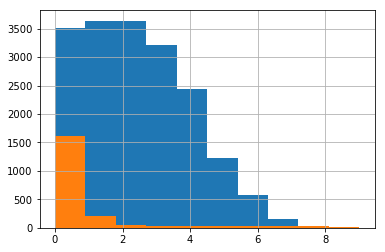

In [114]:
y_share_links.hist(), y_share_videos.hist()

(<matplotlib.axes._subplots.AxesSubplot at 0x12205a390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12205a390>)

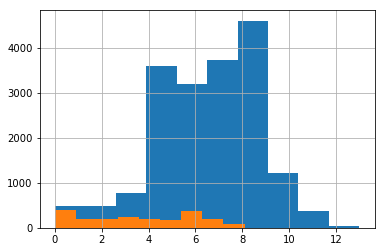

In [117]:
y_clicks_links.hist(), y_clicks_videos.hist()

In [ ]:
##videos

In [144]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

print("LINEAR REGRESSION!")

train_df = pd.read_csv('previous-to-next-page-info-videos-jun16.csv')

###restrict post_type for videos
# train_df = train_df[train_df['post_type_id'] == 2]

# train_df = pd.read_csv('previous-to-next-page-info-vids.csv')
# train_df = pd.read_csv(filepath+'previous-to-next-page-info.csv')
all_pages = list(train_df.display_page.unique())
cross_promotion_features = all_pages

print("With log-scaled performance stats, and also cross-promotion features and page infos!")

page_infos = ['display_page', 'next_page']

# train_features = one_hour_features
# train_features = one_hour_features + page_infos
train_features = one_hour_features + page_infos + cross_promotion_features
# train_features = cross_promotion_features + one_hour_features
# train_features = two_day_features + one_hour_features + cross_promotion_features

for feats in (one_hour_features):
    train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1).astype(int)
train_df['share_bucket'] = np.log(train_df['next_shares']+1).astype(int)

print("No. of data-points = ", len(train_df))

# y_clicks = train_df['next_clicks']
# y_share = train_df['next_shares']
y_clicks = train_df['clicks_bucket']
y_share = train_df['share_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]
####convert page_infos into dummies
X = pd.get_dummies(data = X, columns=['display_page', 'next_page'])

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

clicks_accuracy = []
clicks_error = []
shares_accuracy = []
shares_error = []

for train_index, test_index in kf.split(X):
#     print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    shares_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    shares_error.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    clicks_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    clicks_error.append(error_percent)
    fold += 1
print("Shares performance: Accuracy = ", np.mean(shares_accuracy), " ; Error (/100) = ", np.mean(shares_error))
print("Clicks performance: Accuracy = ", np.mean(clicks_accuracy), " ; Error (/100) = ", np.mean(clicks_error))

LINEAR REGRESSION!
With log-scaled performance stats, and also cross-promotion features and page infos!
No. of data-points =  2035
Shares performance: Accuracy =  0.424384616426  ; Error (/100) =  1.1132326134
Clicks performance: Accuracy =  0.84780479624  ; Error (/100) =  0.205053337391


In [5]:
###LINKS!

In [7]:
features = [
       'next_external_id', 
       'buzz_external_id', 
       'buzz_account_display_name', 
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
       'ext_twodays_consumptions_by_type__link_clicks',
       'ext_twodays_stories_by_action_type__share',
        ]

one_hour_features = [
                   'ext_table1_consumptions_by_type__link_clicks',
                   'ext_table1_consumptions_by_type__other_clicks',
                   'ext_table1_reactions_like_total',
                   'ext_table1_stories_by_action_type__comment',
                   'ext_table1_stories_by_action_type__like',
                   'ext_table1_stories_by_action_type__share', 
                   'ext_table1_engaged_fan',
                   'ext_table1_fan_reach',
                   'ext_table1_impressions',
                   'ext_table1_impressions_fan', 
                ]

two_day_features = [
    'ext_twodays_consumptions_by_type__link_clicks',
    'ext_twodays_stories_by_action_type__share',
]

cross_promotion_features = all_pages

In [9]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

print("LINEAR REGRESSION!")

train_df = pd.read_csv(filepath+'previous-to-next-page-info.csv')
all_pages = list(train_df.buzz_account_display_name.unique())

# print("With log-scaled performance stats, and also cross-promotion features and page infos!")

page_infos = ['buzz_account_display_name', 'next_page']

# train_features = one_hour_features
# train_features = one_hour_features + page_infos
train_features = one_hour_features + page_infos + cross_promotion_features
# train_features = cross_promotion_features + one_hour_features
# train_features = two_day_features + one_hour_features + cross_promotion_features

# for feats in (one_hour_features):
#     train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1).astype(int)
train_df['share_bucket'] = np.log(train_df['next_shares']+1).astype(int)

print("No. of data-points = ", len(train_df))

y_clicks = train_df['next_clicks']
y_share = train_df['next_shares']
# y_clicks = train_df['clicks_bucket']
# y_share = train_df['share_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]
####convert page_infos into dummies
X = pd.get_dummies(data = X, columns=['buzz_account_display_name', 'next_page'])

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

clicks_accuracy = []
clicks_error = []
shares_accuracy = []
shares_error = []

for train_index, test_index in kf.split(X):
#     print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    shares_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    shares_error.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    clicks_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    clicks_error.append(error_percent)
    fold += 1
print("Shares performance: Accuracy = ", np.mean(shares_accuracy), " ; Error (/100) = ", np.mean(shares_error))
print("Clicks performance: Accuracy = ", np.mean(clicks_accuracy), " ; Error (/100) = ", np.mean(clicks_error))

LINEAR REGRESSION!
No. of data-points =  18438
Shares performance: Accuracy =  0.263835189756  ; Error (/100) =  1.08175173842
Clicks performance: Accuracy =  0.538392172144  ; Error (/100) =  0.741219618372


In [219]:
#### FIRST PAGE PROMOTION
print("First page promotion!")

First page promotion!


In [220]:
video_df = pd.read_csv(filepath + 'jan-jun-2017-videos-post-type-2-16.csv')
link_df = pd.read_csv('../code/jan_may_2017_links_cross_posting_info.csv')

###keep only 1st external_id for all buzz_ids

# video_df = video_df[~(video_df['content_id'] == -1)]

###for each buzz_id, get the external ID which was posted FIRST!!!
train = video_df
temp = train
train = train[~(train['content_id'] == -1)]
###
train_grouped = train.groupby(['content_id']).agg({'created_at':'min'})

train_grouped = train_grouped.reset_index()

train_grouped = train_grouped.rename(columns={'created_at':'first_post'})

video_df = pd.merge(train, train_grouped, how='left', on=['content_id'])

video_df = video_df[video_df['created_at'] == video_df['first_post']]
###
train = temp
temp = train[train['content_id'] == -1]
video_df = pd.concat([video_df,temp])
####got 1st external ID for all instances of a buzz ID - VIDEOS

train = link_df
train_grouped = train.groupby(['buzz_post_buzz_id']).agg({'buzz_post_created_at':'min'})

train_grouped = train_grouped.reset_index()

train_grouped = train_grouped.rename(columns={'buzz_post_created_at':'first_post'})

link_df = pd.merge(train, train_grouped, how='left', on=['buzz_post_buzz_id'])

link_df = link_df[link_df['buzz_post_created_at'] == link_df['first_post']]

video_df = video_df[['title', 'display_page']]
link_df = link_df[['buzz_campaign_name','buzz_account_display_name']]
cols = ['title', 'display_page']
video_df.columns = cols
link_df.columns = cols
video_df['is_video'] = 1
link_df['is_video'] = 0

tot_df = pd.concat([video_df, link_df])
tot_df = tot_df.dropna()

In [226]:
all_pages = list(tot_df.display_page.unique())
len(link_df), len(video_df)

(18793, 8836)

In [222]:
###predict where the link will be posted given just the title!
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest

pages = []
num_links = []
average_acc = []
average_pre = []
average_rec = []
average_f1 = []

cv_folds = 10
results = pd.DataFrame()
page_clf = []

df = tot_df
# df = df.dropna()
all_pages = list(df.display_page.unique())

for test_page in all_pages:
#     test_page = "BuzzFeed"
    X_1 = df[df.display_page == test_page]
    X_0 = df[~(df.display_page == test_page)].sample(n=len(X_1))
    if len(X_1) < 2.5*cv_folds:
        continue
    X_1 = X_1[['title', 'display_page']]
    X_0 = X_0[['title', 'display_page']]
    X_all = pd.concat([X_1, X_0])
    
    print(len(X_1), ":", len(X_0))
    def get_class(X, page):
        if X == page:
            return 1
        else:
            return 0
    X_all['class'] = X_all['display_page'].apply(get_class, page = test_page)
#     X_all = X_all.dropna()
    text_clf = Pipeline([
                         ('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
#                          ('featselect', SelectKBest(k = 100)),
                         ('clf', MultinomialNB()),
#                          ('clf', LinearSVC()),
#                          ('clf', RandomForestClassifier()),
#                          ('clf', LogisticRegression()),
    ])
    fold = 0
    kf = KFold(n_splits = cv_folds, shuffle = True)

    accuracy = []
    precision = []
    recall = []
    fscore = []

    X = X_all['title']
    y = X_all['class']

    for train_index, test_index in kf.split(X):
#         print("Fold = ", fold)
        fold+= 1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        text_clf.fit(X_train, y_train)
        y_pred = text_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec, rec, fs, sup = precision_recall_fscore_support(y_test, y_pred, average='macro')
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        fscore.append(fs)
    print("Page: ", test_page, "#links: ", len(X_1), "Accuracy: ", np.mean(accuracy), "Precision: ", np.mean(precision), "Recall: ", np.mean(recall), "Fscore:", np.mean(fscore))
    num_links.append(len(X_1))
    average_acc.append(np.mean(accuracy))
    average_pre.append(np.mean(precision))
    average_rec.append(np.mean(recall))
    average_f1.append(np.mean(fscore))
    pages.append(test_page)
    page_clf.append(text_clf)
results['page'] = pages
results['num_links'] = num_links
results['accuracy'] = average_acc
results['precision'] = average_pre
results['recall'] = average_rec
results['fscore'] = average_f1

print('#pages = ', len(all_pages))
results.mean()

148 : 148
Page:  Bien Tasty #links:  148 Accuracy:  0.86091954023 Precision:  0.875641186299 Recall:  0.865225585388 Fscore: 0.857482216305
99 : 99
Page:  Goodful #links:  99 Accuracy:  0.888157894737 Precision:  0.891567599068 Recall:  0.892049062049 Fscore: 0.884904043549
46 : 46
Page:  Nifty Outdoors #links:  46 Accuracy:  0.816666666667 Precision:  0.823928571429 Recall:  0.829761904762 Fscore: 0.801194083694
144 : 144
Page:  Bring Me #links:  144 Accuracy:  0.771551724138 Precision:  0.796134437673 Recall:  0.774307235377 Fscore: 0.760970903773
504 : 504
Page:  BuzzFeed Video #links:  504 Accuracy:  0.708396039604 Precision:  0.714807826284 Recall:  0.712747625821 Fscore: 0.706375656959
83 : 83
Page:  Nifty #links:  83 Accuracy:  0.872426470588 Precision:  0.883252164502 Recall:  0.880284992785 Fscore: 0.868015433569
653 : 653
Page:  BuzzFeed India #links:  653 Accuracy:  0.729042865531 Precision:  0.803859667768 Recall:  0.729887183971 Fscore: 0.710747912991
227 : 227
Page:  Tast

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Page:  Cocoa Butter #links:  188 Accuracy:  0.643029871977 Precision:  0.694946167313 Recall:  0.653719161806 Fscore: 0.619098063211
59 : 59
Page:  Tasty Junior #links:  59 Accuracy:  0.846212121212 Precision:  0.872162698413 Recall:  0.869058441558 Fscore: 0.831347835171
134 : 134
Page:  BuzzFeed Sweaty #links:  134 Accuracy:  0.743162393162 Precision:  0.762786697951 Recall:  0.762494972348 Fscore: 0.738877847161
50 : 50
Page:  Proper Tasty #links:  50 Accuracy:  0.79 Precision:  0.79630952381 Recall:  0.819880952381 Fscore: 0.78239010989
277 : 277
Page:  BuzzFeed DIY #links:  277 Accuracy:  0.727564935065 Precision:  0.761510901431 Recall:  0.730073378698 Fscore: 0.71609026634
576 : 576
Page:  BuzzFeed Food #links:  576 Accuracy:  0.733605697151 Precision:  0.806909129234 Recall:  0.737562283963 Fscore: 0.716029085747
310 : 310
Page:  BuzzFeed Animals #links:  310 Accuracy:  0.735483870968 Precision:  0.810112376935 Recall:  0.73589184714 Fscore: 0.717509530215
300 : 300
Page:  Obse

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Page:  So Relatable #links:  27 Accuracy:  0.77 Precision:  0.731666666667 Recall:  0.746666666667 Fscore: 0.712896825397
1319 : 1319
Page:  BuzzFeed Quiz #links:  1319 Accuracy:  0.854090332988 Precision:  0.884993498411 Recall:  0.856014923987 Fscore: 0.851178018999
80 : 80
Page:  BuzzFeed Science #links:  80 Accuracy:  0.7125 Precision:  0.759263514264 Recall:  0.726121933622 Fscore: 0.697604617605
26 : 26
Page:  BuzzFeed Pink #links:  26 Accuracy:  0.88 Precision:  0.8875 Recall:  0.88 Fscore: 0.85369047619
368 : 368


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Page:  BuzzFeed España #links:  368 Accuracy:  0.904924102184 Precision:  0.918192150995 Recall:  0.908001583166 Fscore: 0.903735742311
617 : 617
Page:  BuzzFeed Japan News #links:  617 Accuracy:  0.79965250459 Precision:  0.870969763216 Recall:  0.805656934569 Fscore: 0.768253050199
380 : 380
Page:  BuzzFeed Politics #links:  380 Accuracy:  0.855263157895 Precision:  0.875862205305 Recall:  0.856306117618 Fscore: 0.853025472228
38 : 38
Page:  LOLA #links:  38 Accuracy:  0.880357142857 Precision:  0.9 Recall:  0.893333333333 Fscore: 0.87604978355
183 : 183
Page:  BuzzFeed Oz News #links:  183 Accuracy:  0.764714714715 Precision:  0.815274097462 Recall:  0.771961749271 Fscore: 0.750891781885
211 : 211
Page:  BuzzFeed Books #links:  211 Accuracy:  0.687486157254 Precision:  0.796927521414 Recall:  0.691966396971 Fscore: 0.654225900706
248 : 248
Page:  BuzzFeed World #links:  248 Accuracy:  0.800081632653 Precision:  0.836498350218 Recall:  0.808347854014 Fscore: 0.792956814145
97 : 97
Pa

num_links    294.946667
accuracy       0.778449
precision      0.816943
recall         0.786891
fscore         0.764299
dtype: float64

In [223]:
###predict where the link will be posted given just the title!
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest

pages = []
num_links = []
average_acc = []
average_pre = []
average_rec = []
average_f1 = []

cv_folds = 10
results = pd.DataFrame()
page_clf = []

df = link_df
df = df.dropna()
all_pages = list(df.display_page.unique())

for test_page in all_pages:
#     test_page = "BuzzFeed"
    X_1 = df[df.display_page == test_page]
    X_0 = df[~(df.display_page == test_page)].sample(n=len(X_1))
    if len(X_1) < 2.5*cv_folds:
        continue
    X_1 = X_1[['title', 'display_page']]
    X_0 = X_0[['title', 'display_page']]
    X_all = pd.concat([X_1, X_0])
    
    print(len(X_1), ":", len(X_0))
    def get_class(X, page):
        if X == page:
            return 1
        else:
            return 0
    X_all['class'] = X_all['display_page'].apply(get_class, page = test_page)
#     X_all = X_all.dropna()
    text_clf = Pipeline([
                         ('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
#                          ('featselect', SelectKBest(k = 100)),
                         ('clf', MultinomialNB()),
#                          ('clf', LinearSVC()),
#                          ('clf', RandomForestClassifier()),
#                          ('clf', LogisticRegression()),
    ])
    fold = 0
    kf = KFold(n_splits = cv_folds, shuffle = True)

    accuracy = []
    precision = []
    recall = []
    fscore = []

    X = X_all['title']
    y = X_all['class']

    for train_index, test_index in kf.split(X):
#         print("Fold = ", fold)
        fold+= 1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        text_clf.fit(X_train, y_train)
        y_pred = text_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec, rec, fs, sup = precision_recall_fscore_support(y_test, y_pred, average='macro')
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        fscore.append(fs)
    print("Page: ", test_page, "#links: ", len(X_1), "Accuracy: ", np.mean(accuracy), "Precision: ", np.mean(precision), "Recall: ", np.mean(recall), "Fscore:", np.mean(fscore))
    num_links.append(len(X_1))
    average_acc.append(np.mean(accuracy))
    average_pre.append(np.mean(precision))
    average_rec.append(np.mean(recall))
    average_f1.append(np.mean(fscore))
    pages.append(test_page)
    page_clf.append(text_clf)
results['page'] = pages
results['num_links'] = num_links
results['accuracy'] = average_acc
results['precision'] = average_pre
results['recall'] = average_rec
results['fscore'] = average_f1

print('#pages = ', len(all_pages))
results.mean()

1316 : 1316
Page:  BuzzFeed Quiz #links:  1316 Accuracy:  0.871572185736 Precision:  0.893571998173 Recall:  0.872607716549 Fscore: 0.869441263012
966 : 966
Page:  BuzzFeed Japan #links:  966 Accuracy:  0.732874846429 Precision:  0.841203798394 Recall:  0.748710846157 Fscore: 0.696739971919
1022 : 1022
Page:  BuzzFeed Brasil #links:  1022 Accuracy:  0.957395982783 Precision:  0.96006576679 Recall:  0.958771924172 Fscore: 0.957212591707
616 : 616
Page:  BuzzFeed Japan News #links:  616 Accuracy:  0.796649619722 Precision:  0.87537201351 Recall:  0.808796940963 Fscore: 0.769519414375
581 : 581
Page:  BuzzFeed Deutschland #links:  581 Accuracy:  0.973312702623 Precision:  0.973147939064 Recall:  0.974649996572 Fscore: 0.973198717055
649 : 649
Page:  BuzzFeed News #links:  649 Accuracy:  0.793577817531 Precision:  0.81612254549 Recall:  0.795799544467 Fscore: 0.788951299398
212 : 212
Page:  BuzzFeed Oz Politics #links:  212 Accuracy:  0.83992248062 Precision:  0.872769739972 Recall:  0.842

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


num_links    357.557692
accuracy       0.774297
precision      0.823239
recall         0.780952
fscore         0.758762
dtype: float64

In [224]:
###predict where the link will be posted given just the title!
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest

pages = []
num_links = []
average_acc = []
average_pre = []
average_rec = []
average_f1 = []

cv_folds = 10
results = pd.DataFrame()
page_clf = []

df = video_df
df = df.dropna()
all_pages = list(df.display_page.unique())

for test_page in all_pages:
#     test_page = "BuzzFeed"
    X_1 = df[df.display_page == test_page]
    X_0 = df[~(df.display_page == test_page)].sample(n=len(X_1))
    if len(X_1) < 2.5*cv_folds:
        continue
    X_1 = X_1[['title', 'display_page']]
    X_0 = X_0[['title', 'display_page']]
    X_all = pd.concat([X_1, X_0])
    
    print(len(X_1), ":", len(X_0))
    def get_class(X, page):
        if X == page:
            return 1
        else:
            return 0
    X_all['class'] = X_all['display_page'].apply(get_class, page = test_page)
#     X_all = X_all.dropna()
    text_clf = Pipeline([
                         ('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
#                          ('featselect', SelectKBest(k = 100)),
                         ('clf', MultinomialNB()),
#                          ('clf', LinearSVC()),
#                          ('clf', RandomForestClassifier()),
#                          ('clf', LogisticRegression()),
    ])
    fold = 0
    kf = KFold(n_splits = cv_folds, shuffle = True)

    accuracy = []
    precision = []
    recall = []
    fscore = []

    X = X_all['title']
    y = X_all['class']

    for train_index, test_index in kf.split(X):
#         print("Fold = ", fold)
        fold+= 1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        text_clf.fit(X_train, y_train)
        y_pred = text_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec, rec, fs, sup = precision_recall_fscore_support(y_test, y_pred, average='macro')
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        fscore.append(fs)
    print("Page: ", test_page, "#links: ", len(X_1), "Accuracy: ", np.mean(accuracy), "Precision: ", np.mean(precision), "Recall: ", np.mean(recall), "Fscore:", np.mean(fscore))
    num_links.append(len(X_1))
    average_acc.append(np.mean(accuracy))
    average_pre.append(np.mean(precision))
    average_rec.append(np.mean(recall))
    average_f1.append(np.mean(fscore))
    pages.append(test_page)
    page_clf.append(text_clf)
results['page'] = pages
results['num_links'] = num_links
results['accuracy'] = average_acc
results['precision'] = average_pre
results['recall'] = average_rec
results['fscore'] = average_f1

print('#pages = ', len(all_pages))
results.mean()

129 : 129
Page:  Bien Tasty #links:  129 Accuracy:  0.813692307692 Precision:  0.826234100866 Recall:  0.818925865801 Fscore: 0.808907550592
99 : 99
Page:  Goodful #links:  99 Accuracy:  0.763157894737 Precision:  0.769102009102 Recall:  0.770488400488 Fscore: 0.755692796256
46 : 46
Page:  Nifty Outdoors #links:  46 Accuracy:  0.727777777778 Precision:  0.756865079365 Recall:  0.751666666667 Fscore: 0.700682650683
144 : 144


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Page:  Bring Me #links:  144 Accuracy:  0.78460591133 Precision:  0.83453331121 Recall:  0.795694773063 Fscore: 0.773749006121
383 : 383
Page:  BuzzFeed Video #links:  383 Accuracy:  0.736380724539 Precision:  0.763645739172 Recall:  0.739490703094 Fscore: 0.728430776573
83 : 83
Page:  Nifty #links:  83 Accuracy:  0.669117647059 Precision:  0.701826923077 Recall:  0.686542207792 Fscore: 0.659477174442
33 : 33
Page:  BuzzFeed India #links:  33 Accuracy:  0.592857142857 Precision:  0.565357142857 Recall:  0.665 Fscore: 0.549920634921
208 : 208
Page:  Tasty #links:  208 Accuracy:  0.781707317073 Precision:  0.798863647895 Recall:  0.785907893911 Fscore: 0.777279207119
83 : 83


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Page:  BuzzFeed France #links:  83 Accuracy:  0.777941176471 Precision:  0.786242784993 Recall:  0.800966810967 Fscore: 0.773630281397
88 : 88
Page:  Einfach Tasty #links:  88 Accuracy:  0.749673202614 Precision:  0.771598124098 Recall:  0.766156204906 Fscore: 0.74780500717
58 : 58
Page:  Tasty One-Pot #links:  58 Accuracy:  0.825757575758 Precision:  0.872420634921 Recall:  0.85625 Fscore: 0.82322011322
98 : 98
Page:  SOML #links:  98 Accuracy:  0.708421052632 Precision:  0.749813903417 Recall:  0.709283910534 Fscore: 0.692644505112
98 : 98
Page:  Tasty Demais #links:  98 Accuracy:  0.771578947368 Precision:  0.771022449772 Recall:  0.780042596293 Fscore: 0.761838510582
46 : 46
Page:  Tasty Vegetarian #links:  46 Accuracy:  0.673333333333 Precision:  0.753630952381 Recall:  0.726071428571 Fscore: 0.660995670996
30 : 30
Page:  BuzzFeed Ladylike #links:  30 Accuracy:  0.716666666667 Precision:  0.785 Recall:  0.731666666667 Fscore: 0.677777777778
27 : 27
Page:  Tasty Miam #links:  27 Ac

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Page:  Nifty Science #links:  41 Accuracy:  0.718055555556 Precision:  0.71630952381 Recall:  0.735 Fscore: 0.685396825397
25 : 25
Page:  BuzzFeed Violet #links:  25 Accuracy:  0.72 Precision:  0.745 Recall:  0.775 Fscore: 0.695952380952
169 : 169
Page:  BuzzFeed News #links:  169 Accuracy:  0.774777183601 Precision:  0.829403415425 Recall:  0.77966323709 Fscore: 0.764571020645
38 : 38
Page:  Pero Like #links:  38 Accuracy:  0.658928571429 Precision:  0.758452380952 Recall:  0.726666666667 Fscore: 0.641746031746
74 : 74
Page:  BuzzFeed México #links:  74 Accuracy:  0.661904761905 Precision:  0.702509018759 Recall:  0.690158730159 Fscore: 0.657645801911
51 : 51
Page:  BuzzFeed Español #links:  51 Accuracy:  0.685454545455 Precision:  0.715238095238 Recall:  0.716944444444 Fscore: 0.671013431013
27 : 27
Page:  BuzzFeed UK #links:  27 Accuracy:  0.603333333333 Precision:  0.615 Recall:  0.645833333333 Fscore: 0.577738095238
34 : 34
Page:  Nifty Pets #links:  34 Accuracy:  0.728571428571 P

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Page:  Top Knot #links:  100 Accuracy:  0.72 Precision:  0.742887806638 Recall:  0.723332223332 Fscore: 0.710328421952
59 : 59
Page:  Tasty Junior #links:  59 Accuracy:  0.663636363636 Precision:  0.671666666667 Recall:  0.681547619048 Fscore: 0.65943972694
130 : 130
Page:  BuzzFeed Sweaty #links:  130 Accuracy:  0.7 Precision:  0.717391752984 Recall:  0.713652793285 Fscore: 0.696516360146
50 : 50
Page:  Proper Tasty #links:  50 Accuracy:  0.65 Precision:  0.691388888889 Recall:  0.678333333333 Fscore: 0.639903429903
31 : 31
Page:  BuzzFeed Food #links:  31 Accuracy:  0.642857142857 Precision:  0.723333333333 Recall:  0.683333333333 Fscore: 0.633333333333
42 : 42
Page:  BuzzFeed Animals #links:  42 Accuracy:  0.611111111111 Precision:  0.676845238095 Recall:  0.636666666667 Fscore: 0.586385281385
48 : 48
Page:  BuzzFeed Tech #links:  48 Accuracy:  0.746666666667 Precision:  0.834821428571 Recall:  0.764404761905 Fscore: 0.724671162171
48 : 48
Page:  BuzzFeed #links:  48 Accuracy:  0.58

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being

Page:  BuzzFeed Community #links:  27 Accuracy:  0.583333333333 Precision:  0.629166666667 Recall:  0.633333333333 Fscore: 0.559047619048
29 : 29
Page:  BuzzFeed UK News #links:  29 Accuracy:  0.676666666667 Precision:  0.7 Recall:  0.760833333333 Fscore: 0.653134920635
86 : 86
Page:  BuzzFeed Australia #links:  86 Accuracy:  0.587908496732 Precision:  0.632202380952 Recall:  0.611834415584 Fscore: 0.569705702794
#pages =  94


num_links    76.682927
accuracy      0.684675
precision     0.722010
recall        0.715871
fscore        0.669114
dtype: float64

In [196]:
###train on links and predict on videos
###predict where the link will be posted given just the title!
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest

pages = []
num_links = []
average_acc = []
average_pre = []
average_rec = []
average_f1 = []

cv_folds = 10
results = pd.DataFrame()
page_clf = []

df = tot_df
# df = df.dropna()
all_pages = list(df.display_page.unique())

for test_page in all_pages:
#     test_page = "BuzzFeed"

    ##train on links
    df = link_df
    df = df.dropna()
    
    X_1 = df[df.display_page == test_page]
    X_0 = df[~(df.display_page == test_page)].sample(n=len(X_1))
#     if len(X_1) < 2.5*cv_folds:
    if len(X_1) < 10:
        continue
    X_1 = X_1[['title', 'display_page']]
    X_0 = X_0[['title', 'display_page']]
    X_all = pd.concat([X_1, X_0])
    
    def get_class(X, page):
        if X == page:
            return 1
        else:
            return 0
    X_all['class'] = X_all['display_page'].apply(get_class, page = test_page)
#     X_all = X_all.dropna()
    X_train = X_all['title']
    y_train = X_all['class']
    
    ##test on videos 
    df = video_df
    df = df.dropna()
    X_1 = df[df.display_page == test_page]
    X_0 = df[~(df.display_page == test_page)].sample(n=len(X_1))
    if len(X_1) < 2:
        continue
#     X_1 = X_1[['title', 'display_page']]
    X_0 = X_0[['title', 'display_page']]
    X_all = pd.concat([X_1, X_0])
    
    def get_class(X, page):
        if X == page:
            return 1
        else:
            return 0
    X_all['class'] = X_all['display_page'].apply(get_class, page = test_page)
#     X_all = X_all.dropna()
    X_test = X_all['title']
    y_test = X_all['class']

    text_clf = Pipeline([
                         ('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
#                          ('featselect', SelectKBest(k = 100)),
                         ('clf', MultinomialNB()),
#                          ('clf', LinearSVC()),
#                          ('clf', RandomForestClassifier()),
#                          ('clf', LogisticRegression()),
    ])

    accuracy = []
    precision = []
    recall = []
    fscore = []

    text_clf.fit(X_train, y_train)
    y_pred = text_clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec, rec, fs, sup = precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    fscore.append(fs)
    
    print("Page: ", test_page, "#train links: ", len(X_train), "#test links: ", len(X_test), "Accuracy: ", np.mean(accuracy), "Precision: ", np.mean(precision), "Recall: ", np.mean(recall), "Fscore:", np.mean(fscore))
    
    num_links.append(len(X_1))
    average_acc.append(np.mean(accuracy))
    average_pre.append(np.mean(precision))
    average_rec.append(np.mean(recall))
    average_f1.append(np.mean(fscore))
    pages.append(test_page)
    page_clf.append(text_clf)
    
    
results['page'] = pages
results['num_links'] = num_links
results['accuracy'] = average_acc
results['precision'] = average_pre
results['recall'] = average_rec
results['fscore'] = average_f1

results.mean()

Page:  Bien Tasty #train links:  38 #test links:  258 Accuracy:  0.833333333333 Precision:  0.842407407407 Recall:  0.833333333333 Fscore: 0.832221768522
Page:  BuzzFeed Video #train links:  242 #test links:  766 Accuracy:  0.650130548303 Precision:  0.656979520846 Recall:  0.650130548303 Fscore: 0.646272288044
Page:  BuzzFeed India #train links:  1240 #test links:  66 Accuracy:  0.727272727273 Precision:  0.735042735043 Recall:  0.727272727273 Fscore: 0.725
Page:  Tasty #train links:  38 #test links:  416 Accuracy:  0.454326923077 Precision:  0.449713704034 Recall:  0.454326923077 Fscore: 0.441518271659
Page:  BuzzFeed France #train links:  1092 #test links:  166 Accuracy:  0.753012048193 Precision:  0.774056603774 Recall:  0.753012048193 Fscore: 0.748177748178
Page:  BuzzFeed Philippines #train links:  322 #test links:  4 Accuracy:  0.75 Precision:  0.833333333333 Recall:  0.75 Fscore: 0.733333333333
Page:  SOML #train links:  48 #test links:  196 Accuracy:  0.647959183673 Precision:

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Page:  BuzzFeed Community #train links:  696 #test links:  54 Accuracy:  0.537037037037 Precision:  0.5375 Recall:  0.537037037037 Fscore: 0.53560371517
Page:  BuzzFeed Celeb #train links:  960 #test links:  22 Accuracy:  0.681818181818 Precision:  0.696428571429 Recall:  0.681818181818 Fscore: 0.675789473684
Page:  BuzzFeed Canada #train links:  502 #test links:  12 Accuracy:  0.583333333333 Precision:  0.611111111111 Recall:  0.583333333333 Fscore: 0.555555555556
Page:  BuzzFeed Brasil #train links:  2044 #test links:  38 Accuracy:  0.815789473684 Precision:  0.816666666667 Recall:  0.815789473684 Fscore: 0.815661815662
Page:  BuzzFeed UK News #train links:  732 #test links:  58 Accuracy:  0.741379310345 Precision:  0.767105263158 Recall:  0.741379310345 Fscore: 0.734998477003
Page:  BuzzFeed Australia #train links:  1436 #test links:  172 Accuracy:  0.540697674419 Precision:  0.545147742613 Recall:  0.540697674419 Fscore: 0.529093744585
Page:  BuzzFeed UK Politics #train links:  512

num_links    45.428571
accuracy      0.646080
precision     0.661725
recall        0.646080
fscore        0.632110
dtype: float64

In [198]:
video_df[['title', 'display_page']].dropna()

,title,display_page
1,Pudín de pan con plátano,Bien Tasty
3,Meal-Prep Chicken 5 Ways,Goodful
4,First Aid for Common Summer Injuries,Nifty Outdoors
5,This woman invented the salted caramel (and th...,Bring Me
6,Vegetarians Try Bacon-Flavored Products,BuzzFeed Video
7,4 Ways to Remove Stickers,Nifty
8,Fidget Spinners Have Officially Gone Too Far,BuzzFeed India
9,Salmon Meal Prep for Two,Tasty
10,Barco-tacos de calabacita con carne,Bien Tasty
12,"""Tu devrais perdre du poids""",BuzzFeed France


In [199]:
link_df[['title', 'display_page']].dropna()

,title,display_page
0,"We'll Tell You What % Drama-Obsessed You Are, ...",BuzzFeed Quiz
1,スター・ウォーズ第1作の舞台裏写真 ここからすべてが始まった,BuzzFeed Japan
3,"Na briga biscoito x bolacha, Portugal é bolacha",BuzzFeed Brasil
4,「ドアラも勝ちたい」中日交流戦の面白広告が変化した切ない理由,BuzzFeed Japan News
5,"18 Fakten über BumBum Eis, die jedes Kind der ...",BuzzFeed Deutschland
6,17 Powerful John F. Kennedy Quotes To Inspire ...,BuzzFeed News
10,「自分を責めないで」 爆発テロで悲しむアリアナに「お父さん」がエール,BuzzFeed Japan News
12,Britain And Canada Abandoned Plans To Drug Tes...,BuzzFeed Oz Politics
13,¿Sacarías más de diez en este examen de palabr...,Quizzes En Español
15,Parte dos aliados de Temer teme que novo minis...,BuzzFeed News BR


In [204]:
video_df.groupby('display_page').count()

,title,is_video
display_page,,
Adam Ellis,0,16
Another Round,0,11
BF PubHub Dev,0,17
Bien Tasty,129,140
Bored AF,0,1
Bring Me,144,146
Buy Me That,2,30
BuzzFeed,48,179
BuzzFeed Animals,42,153


In [203]:
link_df[link_df['display_page'] == 'BuzzFeed'].shape

(978, 3)

In [205]:
video_df[video_df['display_page'] == 'BuzzFeed'].shape

(179, 3)